In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data_dir = '/tmp/tensorflow/mnist/input_data'
# Import data
mnist = input_data.read_data_sets(data_dir, one_hot=True)
x_train, x_val = mnist.train.images, mnist.test.images
print("x_train.shape = {}, x_val.shape = {}".format(x_train.shape, x_val.shape))

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
x_train.shape = (55000, 784), x_val.shape = (10000, 784)


In [4]:
import tensorflow as tf
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

hid_1 = 320
hid_2 = 160 
code_dim = 80

x = tf.placeholder(tf.float32, shape = [None, 784])
e_W_1 = weight_variable([784, hid_1], "e_W_1")
e_b_1 = bias_variable([hid_1], "e_b_1")
e_layer1 = tf.nn.relu(tf.matmul(x, e_W_1) + e_b_1)
e_W_2 = weight_variable([hid_1, hid_2], "e_W_2")
e_b_2 = bias_variable([hid_2], "e_b_2")
e_layer2 = tf.nn.relu(tf.matmul(e_layer1, e_W_2) + e_b_2)
e_W_3 = weight_variable([hid_2, code_dim], "e_W_3")
e_b_3 = bias_variable([code_dim], "e_b_3")

code_layer = tf.matmul(e_layer2, e_W_3) + e_b_3

d_W_1 = weight_variable([code_dim, hid_2], "d_W_1")
d_b_1 = bias_variable([hid_2], "d_b_1")
d_layer1 = tf.nn.relu(tf.matmul(code_layer, d_W_1) + d_b_1)
d_W_2 = weight_variable([hid_2, hid_1], "d_W_2")
d_b_2 = bias_variable([hid_1], "d_b_2")
d_layer2 = tf.nn.relu(tf.matmul(d_layer1, d_W_2) + d_b_2)
d_W_3 = weight_variable([hid_1, 784], "d_W_3")
d_b_3 = bias_variable([784], "d_b_3")
output_layer = tf.nn.sigmoid(tf.matmul(d_layer2, d_W_3) + d_b_3)

loss = tf.reduce_mean(tf.pow(output_layer - x, 2))
l_rate = 1e-3
optimizer = tf.train.AdamOptimizer(l_rate).minimize(loss)

total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    shape = variable.get_shape()
#     print(shape)
#     print(len(shape))
    variable_parameters = 1
    for dim in shape:
#         print(dim)
        variable_parameters *= dim.value
#     print(variable_parameters)
    total_parameters += variable_parameters
print("total_parameters = {}".format(total_parameters))

total_parameters = 631584


In [7]:
init_op = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init_op)
for i in range(100000):
    batch = mnist.train.next_batch(50)
    if i%5000 == 0:
        print("step = %d, val_loss = %g"%(i, loss.eval(feed_dict={x: mnist.test.images})))
    optimizer.run(feed_dict={x: batch[0]})

print("final loss train %g" % loss.eval(feed_dict={x: mnist.train.images}))
print("final loss val %g" % loss.eval(feed_dict={x: mnist.test.images}))

step = 0, val_loss = 0.278281
step = 5000, val_loss = 0.00499616
step = 10000, val_loss = 0.00376916
step = 15000, val_loss = 0.0032774
step = 20000, val_loss = 0.00304279
step = 25000, val_loss = 0.00273234
step = 30000, val_loss = 0.00266098
step = 35000, val_loss = 0.00265758
step = 40000, val_loss = 0.00254653
step = 45000, val_loss = 0.00248939
step = 50000, val_loss = 0.00258257
step = 55000, val_loss = 0.00234895
step = 60000, val_loss = 0.00238821
step = 65000, val_loss = 0.00236267
step = 70000, val_loss = 0.00249815
step = 75000, val_loss = 0.00244835
step = 80000, val_loss = 0.0023495
step = 85000, val_loss = 0.00225198
step = 90000, val_loss = 0.00234263
step = 95000, val_loss = 0.00228195
final loss train 0.00211032
final loss val 0.00230398


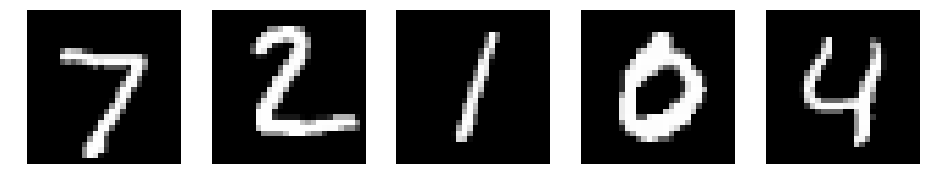

original mnist validation data


In [9]:
import matplotlib.pyplot as plt
fig_num = 5
plt.subplots(figsize=(16,16))
for i in range(fig_num):
    plt.subplot(1,fig_num,i+1)
    plt.imshow(x_val[i].reshape(28,28), cmap='Greys_r')
    plt.axis('off')
plt.show()
print("original mnist validation data")

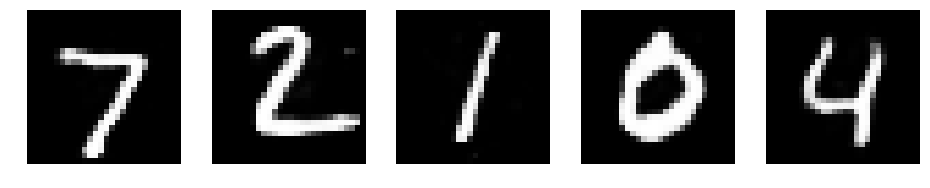

pca reconstruct mnist validation data


In [11]:
import numpy as np
output_dec = output_layer.eval(feed_dict = {x: mnist.test.images})
output_dec_clip = np.clip(output_dec,0,1)
plt.subplots(figsize=(16,16))
for i in range(fig_num):
    plt.subplot(1,fig_num,i+1)
    plt.imshow(output_dec_clip[i].reshape(28,28), cmap='Greys_r')
    plt.axis('off')
plt.show()
print("pca reconstruct mnist validation data")